In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # To show all columns
pd.set_option('display.width', None)       # To ensure wide DataFrames are not wrapped

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NYC_property_sales_regression/sales_pluto_cpi_combined_engineered.csv')

In [ ]:
df

,BOROUGH,NEIGHBORHOOD,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS CATEGORY NUMBER,BUILDING CLASS CATEGORY DESCRIPTION,SALE YEAR,SALE MONTH,latitude,longitude,CPI,ADJUSTED SALE PRICE
0,1,ALPHABET CITY,1,374,46,A4,10009,1,0,1,2116.0,4400.0,1900,1,A4,399000,2022-09-29,1,ONE FAMILY DWELLINGS,2022,9,40.721716,-73.978275,296.808,437127
1,1,ALPHABET CITY,1,377,1,S2,10009,2,1,3,1502.0,2790.0,1901,1,S2,2999999,2022-09-15,2,TWO FAMILY DWELLINGS,2022,9,40.724184,-73.978458,296.808,3286669
2,1,CHELSEA,1,720,6,A4,10011,1,0,1,1562.0,4150.0,1901,1,A4,11100000,2022-06-17,1,ONE FAMILY DWELLINGS,2022,6,40.747039,-74.004085,296.311,12181076
3,1,CHELSEA,1,767,17,A4,10011,1,0,1,993.0,4500.0,1910,1,A4,6995000,2022-07-28,1,ONE FAMILY DWELLINGS,2022,7,40.741203,-73.999664,296.276,7677179
4,1,CHELSEA,1,769,52,S1,10011,1,1,2,2300.0,4298.0,1901,1,S1,4400000,2022-04-08,1,ONE FAMILY DWELLINGS,2022,4,40.742579,-73.998376,289.109,4948818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549055,5,WOODROW,1,6913,70,A1,10309,1,0,1,4000.0,2124.0,1970,1,A1,810000,2023-08-24,1,ONE FAMILY DWELLINGS,2023,8,40.533101,-74.204407,307.026,857867
549056,5,WOODROW,1,6958,24,A5,10309,1,0,1,800.0,960.0,1987,1,A5,357000,2023-10-31,1,ONE FAMILY DWELLINGS,2023,10,40.535675,-74.210984,307.671,377304
549057,5,WOODROW,1,6971,12,A1,10309,1,0,1,4000.0,1632.0,1970,1,A1,830000,2023-10-31,1,ONE FAMILY DWELLINGS,2023,10,40.539220,-74.210200,307.671,877206
549058,5,WOODROW,1,6914,51,B2,10309,2,0,2,6000.0,1932.0,1976,1,B2,949000,2023-10-11,2,TWO FAMILY DWELLINGS,2023,10,40.534276,-74.204242,307.671,1002975


In [ ]:
import pandas as pd
summary_df = pd.DataFrame({'Data Type': df.dtypes, 'Unique Values': df.nunique()})
display(summary_df)

,Data Type,Unique Values
BOROUGH,int64,5
NEIGHBORHOOD,object,251
TAX CLASS AT PRESENT,object,10
BLOCK,int64,13120
LOT,int64,1714
BUILDING CLASS AT PRESENT,object,95
ZIP CODE,int64,175
RESIDENTIAL UNITS,int64,63
COMMERCIAL UNITS,int64,15
TOTAL UNITS,int64,70


In [ ]:
df['BOROUGH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: BOROUGH
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['BOROUGH'].isnull().sum()

np.int64(0)

In [ ]:
df['BOROUGH'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
df['BOROUGH'].value_counts()

,count
BOROUGH,
4,231651
3,154883
5,98518
2,59035
1,4973


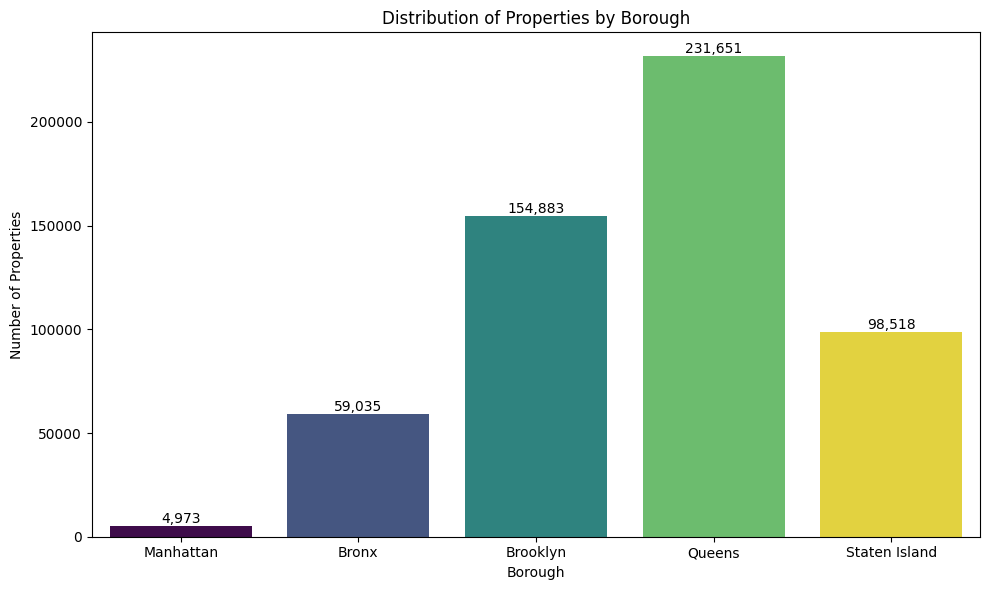

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'BOROUGH' column
borough_counts = df['BOROUGH'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_counts.index, y=borough_counts.values, hue=borough_counts.index, palette='viridis', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Properties')

# Customize x-axis ticks for better readability (if borough numbers are not self-explanatory)
# You might want to replace numbers with actual borough names if available or create a mapping
borough_names = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}
plt.xticks(ticks=range(len(borough_counts.index)), labels=[borough_names.get(b, str(b)) for b in borough_counts.index], rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(borough_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['NEIGHBORHOOD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: NEIGHBORHOOD
Non-Null Count   Dtype 
--------------   ----- 
549060 non-null  object
dtypes: object(1)
memory usage: 4.2+ MB


In [ ]:
df['NEIGHBORHOOD'].isnull().sum()

np.int64(0)

In [ ]:
df['NEIGHBORHOOD'].nunique()

251

In [ ]:
df['NEIGHBORHOOD'].value_counts()

,count
NEIGHBORHOOD,
FLUSHING-NORTH,16006
BEDFORD STUYVESANT,11984
EAST NEW YORK,11186
SO. JAMAICA-BAISLEY PARK,10576
RICHMOND HILL,10540
...,...
FLATIRON,2
FASHION,2
JAVITS CENTER,1


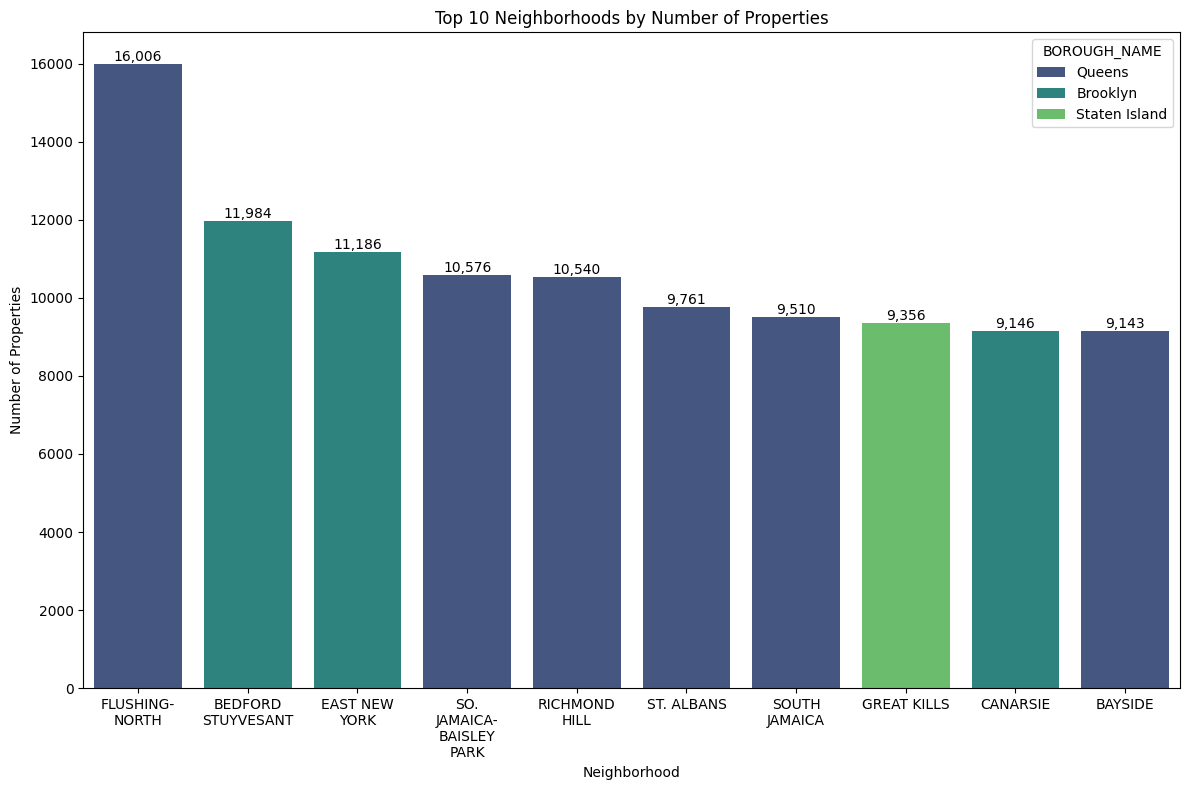

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
import pandas as pd

# Get the top 10 neighborhoods by count
neighborhood_counts = df['NEIGHBORHOOD'].value_counts().head(10)

# Create a temporary DataFrame for plotting
plot_data = pd.DataFrame({
    'NEIGHBORHOOD': neighborhood_counts.index,
    'COUNT': neighborhood_counts.values
})

# Get a mapping from neighborhood to borough.
neighborhood_to_borough_map = df[['NEIGHBORHOOD', 'BOROUGH']].drop_duplicates().set_index('NEIGHBORHOOD')['BOROUGH'].to_dict()

# Add the borough number to our plot_data DataFrame
plot_data['BOROUGH'] = plot_data['NEIGHBORHOOD'].map(neighborhood_to_borough_map)

# Map borough numbers to names
borough_names = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}
plot_data['BOROUGH_NAME'] = plot_data['BOROUGH'].map(borough_names)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='NEIGHBORHOOD', y='COUNT', hue='BOROUGH_NAME', data=plot_data, palette='viridis')

# Add titles and labels
plt.title('Top 10 Neighborhoods by Number of Properties')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Properties')

# Wrap x-axis tick labels for better readability
wrapped_labels = [ '\n'.join(wrap(label, 11)) for label in plot_data['NEIGHBORHOOD'] ]
plt.xticks(ticks=range(len(plot_data['NEIGHBORHOOD'])), labels=wrapped_labels, rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(plot_data['COUNT']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['ZIP CODE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: ZIP CODE
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['ZIP CODE'].isnull().sum()

np.int64(0)

In [ ]:
df['ZIP CODE'].nunique()

175

In [ ]:
min_zip_code = df['ZIP CODE'].min()
max_zip_code = df['ZIP CODE'].max()

print(f"Min ZIP CODE: {min_zip_code}")
print(f"Max ZIP CODE: {max_zip_code}")

Min ZIP CODE: 0
Max ZIP CODE: 11697


In [ ]:
import numpy as np
np.sort(df['ZIP CODE'].unique())

array([    0, 10001, 10002, 10003, 10007, 10009, 10010, 10011, 10012,
       10013, 10014, 10016, 10017, 10018, 10019, 10021, 10022, 10023,
       10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032,
       10033, 10034, 10035, 10036, 10037, 10038, 10040, 10065, 10075,
       10128, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308,
       10309, 10310, 10312, 10314, 10451, 10452, 10453, 10454, 10455,
       10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464,
       10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473,
       10474, 10475, 10803, 11001, 11004, 11040, 11101, 11102, 11103,
       11104, 11105, 11106, 11201, 11203, 11204, 11205, 11206, 11207,
       11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216,
       11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225,
       11226, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235,
       11236, 11237, 11238, 11239, 11249, 11354, 11355, 11356, 11357,
       11358, 11360,

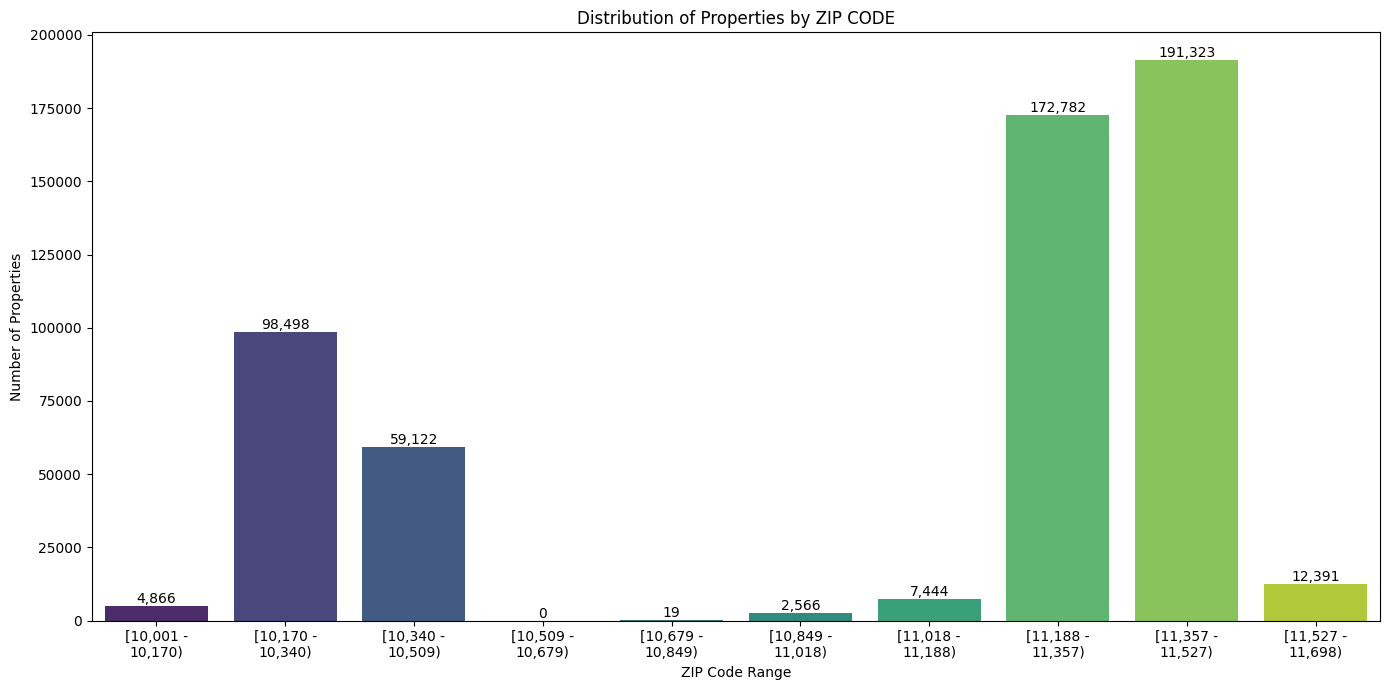

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from textwrap import wrap

# Filter out ZIP CODE = 0, assuming 0 is an invalid ZIP code
zip_codes_filtered = df[df['ZIP CODE'] != 0]['ZIP CODE']

# Create bins for ZIP CODES
zip_code_bins = pd.cut(zip_codes_filtered, bins=10, right=False, include_lowest=True)

# Get the value counts for each bin and sort by bin order
binned_counts = zip_code_bins.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=binned_counts.index.astype(str), y=binned_counts.values, palette='viridis', hue=binned_counts.index.astype(str), legend=False)

# Add titles and labels
plt.title('Distribution of Properties by ZIP CODE')
plt.xlabel('ZIP Code Range')
plt.ylabel('Number of Properties')

# Format bin labels as integers and wrap for readability
formatted_labels = []
for interval in binned_counts.index:
    label = f'[{int(interval.left):,} - {int(interval.right):,})'
    formatted_labels.append(label)
wrapped_labels = [ '\n'.join(wrap(label, 10)) for label in formatted_labels ]
plt.xticks(ticks=range(len(binned_counts.index)), labels=wrapped_labels, rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(binned_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['BLOCK'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: BLOCK
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['BLOCK'].isnull().sum()

np.int64(0)

In [ ]:
df['BLOCK'].nunique()

13120

In [ ]:
df['BLOCK'].unique()

array([  374,   377,   720, ..., 12572,  9117, 11562])

In [ ]:
np.sort(df['BLOCK'].unique())

array([    3,     6,     7, ..., 16323, 16340, 16350])

In [ ]:
df['BLOCK'].min()

3

In [ ]:
df['BLOCK'].max()

16350

In [ ]:
df['LOT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: LOT
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['LOT'].isnull().sum()

np.int64(0)

In [ ]:
df['LOT'].unique()

array([  46,    1,    6, ..., 1305, 2740,  751])

In [ ]:
df['LOT'].nunique()

1714

In [ ]:
df['LOT'].min()

1

In [ ]:
df['LOT'].max()

4336

In [ ]:
df['TAX CLASS AT TIME OF SALE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: TAX CLASS AT TIME OF SALE
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['TAX CLASS AT TIME OF SALE'].isnull().sum()

np.int64(0)

In [ ]:
df['TAX CLASS AT TIME OF SALE'].unique()

array([1])

In [ ]:
df['TAX CLASS AT TIME OF SALE'].nunique()

1

In [ ]:
df['SALE YEAR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: SALE YEAR
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['SALE YEAR'].isnull().sum()

np.int64(0)

In [ ]:
df['SALE YEAR'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2023])

In [ ]:
df['SALE YEAR'].nunique()

21

In [ ]:
df['SALE YEAR'].max()

2023

In [ ]:
df['SALE YEAR'].min()

2003

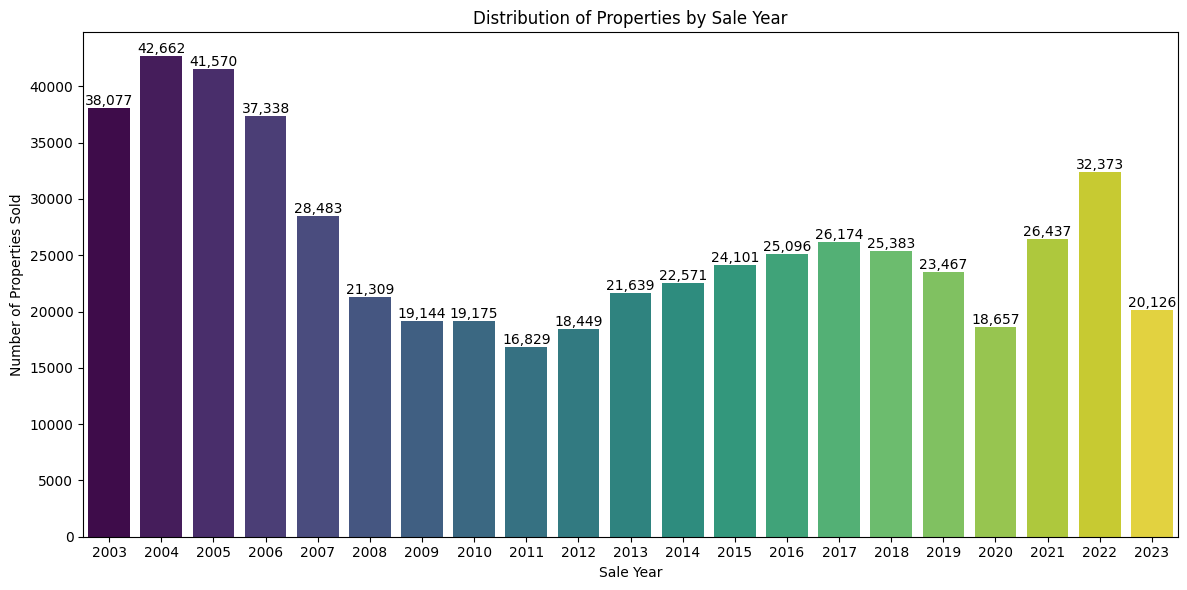

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'SALE YEAR' column
sale_year_counts = df['SALE YEAR'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sale_year_counts.index, y=sale_year_counts.values, hue=sale_year_counts.index, palette='viridis', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Sale Year')
plt.xlabel('Sale Year')
plt.ylabel('Number of Properties Sold')

# Rotate x-axis labels if there are many years
plt.xticks(rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(sale_year_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['SALE MONTH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: SALE MONTH
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['SALE MONTH'].isnull().sum()

np.int64(0)

In [ ]:
df['SALE MONTH'].nunique()

12

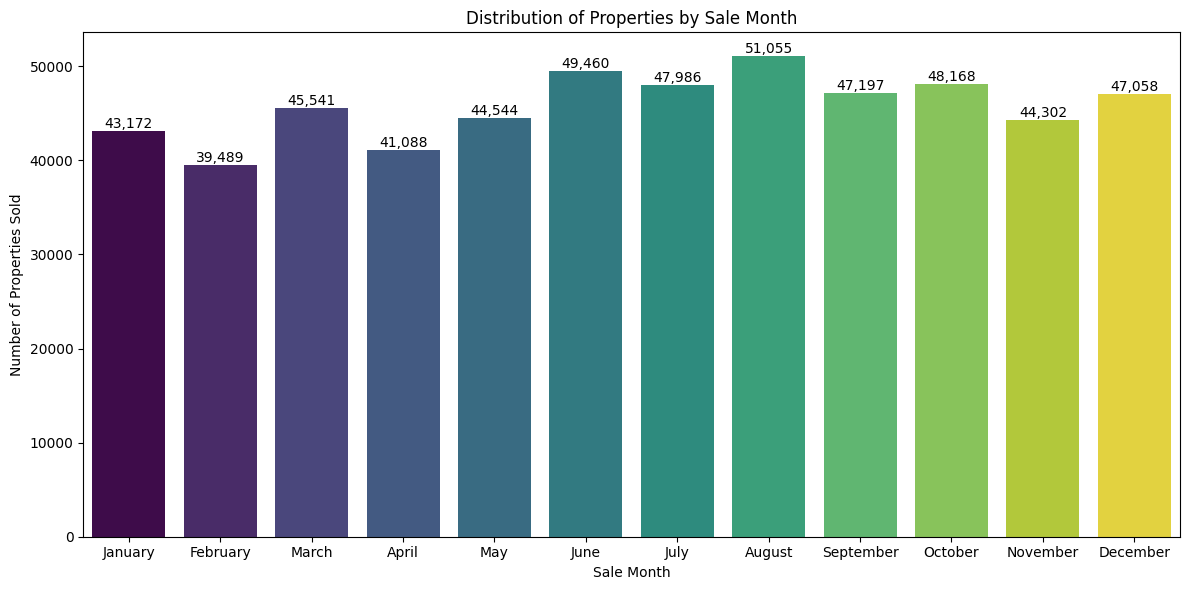

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'SALE MONTH' column
sale_month_counts = df['SALE MONTH'].value_counts().sort_index()

# Map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sale_month_counts.index, y=sale_month_counts.values, hue=sale_month_counts.index, palette='viridis', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Sale Month')
plt.xlabel('Sale Month')
plt.ylabel('Number of Properties Sold')

# Set x-axis tick labels to month names and ensure correct alignment
plt.xticks(ticks=range(len(sale_month_counts.index)), labels=[month_names[m] for m in sale_month_counts.index], rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(sale_month_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['LAND SQUARE FEET'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: LAND SQUARE FEET
Non-Null Count   Dtype  
--------------   -----  
549060 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [ ]:
df['LAND SQUARE FEET'].isnull().sum()

np.int64(0)

In [ ]:
df['LAND SQUARE FEET'].nunique()

10082

In [ ]:
df['LAND SQUARE FEET'].max()

12253428.0

In [ ]:
df['LAND SQUARE FEET'].min()

0.0

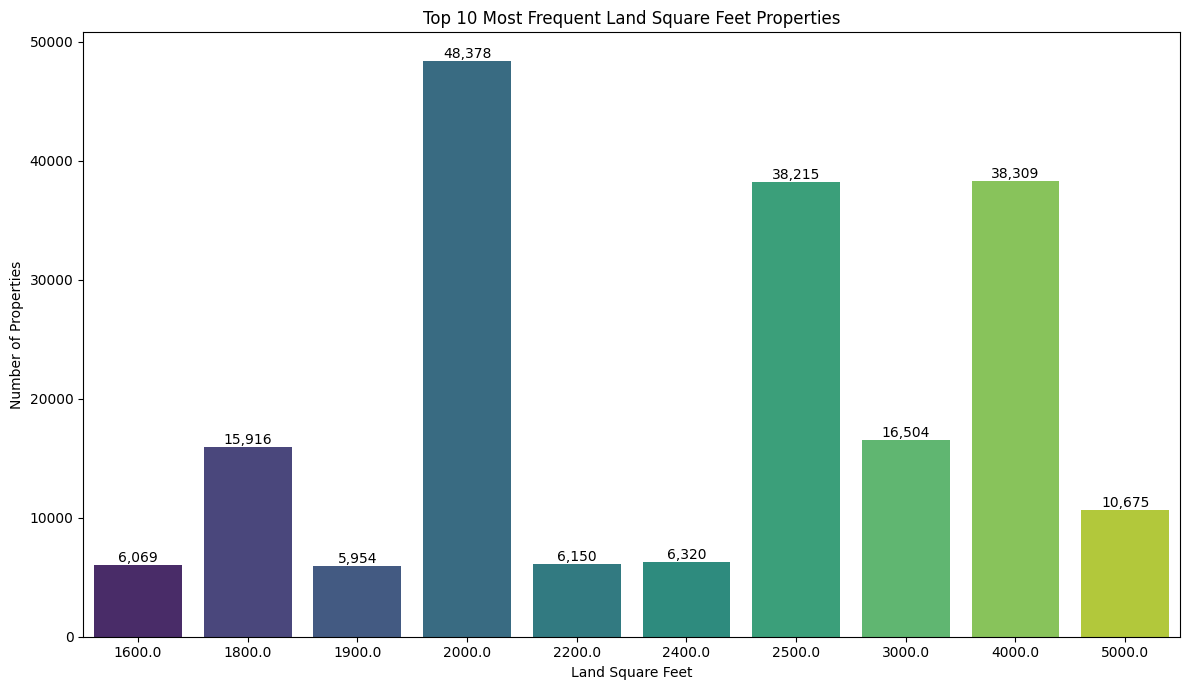

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the value counts for 'LAND SQUARE FEET' and select the top 10
top_10_land_sf_counts = df['LAND SQUARE FEET'].value_counts().head(10).sort_index()

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_land_sf_counts.index.astype(str), y=top_10_land_sf_counts.values, hue=top_10_land_sf_counts.index.astype(str), palette='viridis', legend=False)

# Add titles and labels
plt.title('Top 10 Most Frequent Land Square Feet Properties')
plt.xlabel('Land Square Feet')
plt.ylabel('Number of Properties')

# Add values on top of the bars
for index, value in enumerate(top_10_land_sf_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# Rotate x-axis labels for readability if necessary
plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
df['GROSS SQUARE FEET'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: GROSS SQUARE FEET
Non-Null Count   Dtype  
--------------   -----  
549060 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [ ]:
df['GROSS SQUARE FEET'].nunique()

6476

In [ ]:
df['GROSS SQUARE FEET'].isnull().sum()

np.int64(0)

In [ ]:
df['GROSS SQUARE FEET'].max()

173000.0

In [ ]:
df['GROSS SQUARE FEET'].min()

0.0

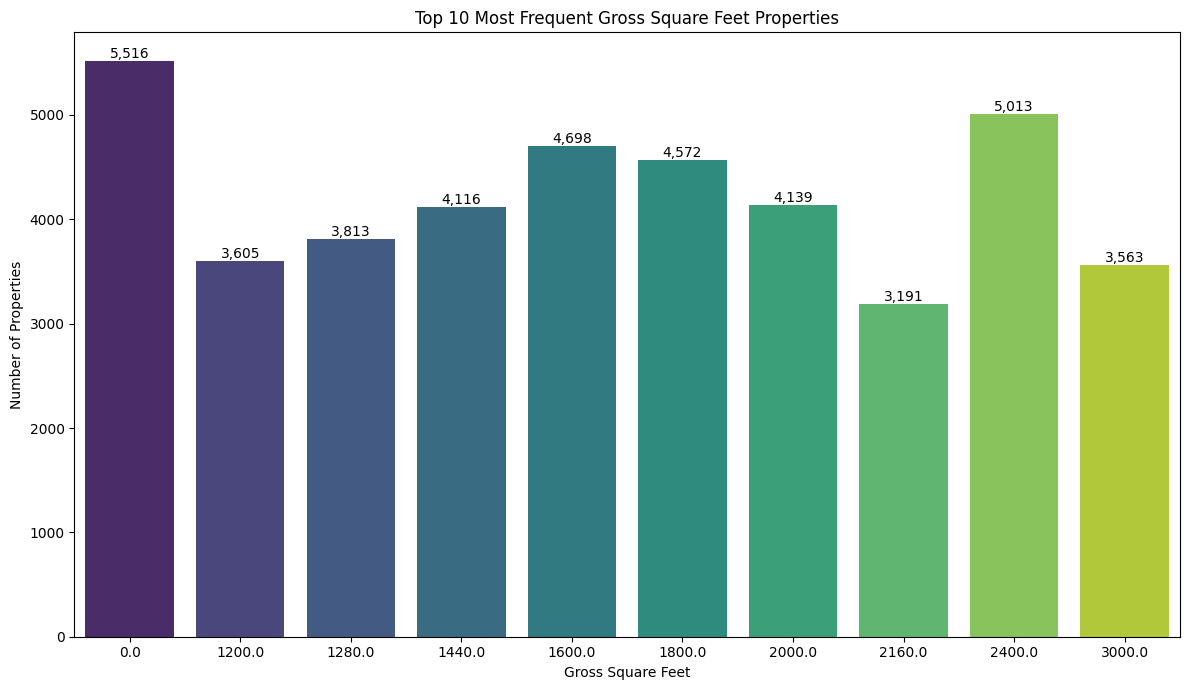

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the value counts for 'GROSS SQUARE FEET' and select the top 10
top_10_gross_sf_counts = df['GROSS SQUARE FEET'].value_counts().head(10).sort_index()

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_gross_sf_counts.index.astype(str), y=top_10_gross_sf_counts.values, hue=top_10_gross_sf_counts.index.astype(str), palette='viridis', legend=False)

# Add titles and labels
plt.title('Top 10 Most Frequent Gross Square Feet Properties')
plt.xlabel('Gross Square Feet')
plt.ylabel('Number of Properties')

# Add values on top of the bars
for index, value in enumerate(top_10_gross_sf_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

# Rotate x-axis labels for readability if necessary
plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

In [ ]:
df['YEAR BUILT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: YEAR BUILT
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['YEAR BUILT'].isnull().sum()

np.int64(0)

In [ ]:
df['YEAR BUILT'].nunique()

197

In [ ]:
np.sort(df['YEAR BUILT'].unique())

array([   0, 1050, 1380, 1798, 1800, 1814, 1821, 1822, 1824, 1825, 1826,
       1829, 1830, 1831, 1832, 1834, 1835, 1836, 1838, 1839, 1840, 1841,
       1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1864, 1865,
       1866, 1867, 1868, 1869, 1870, 1871, 1872, 1874, 1875, 1878, 1880,
       1881, 1882, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 19

In [ ]:
df['YEAR BUILT'].max()

2024

In [ ]:
df['YEAR BUILT'].min()

0

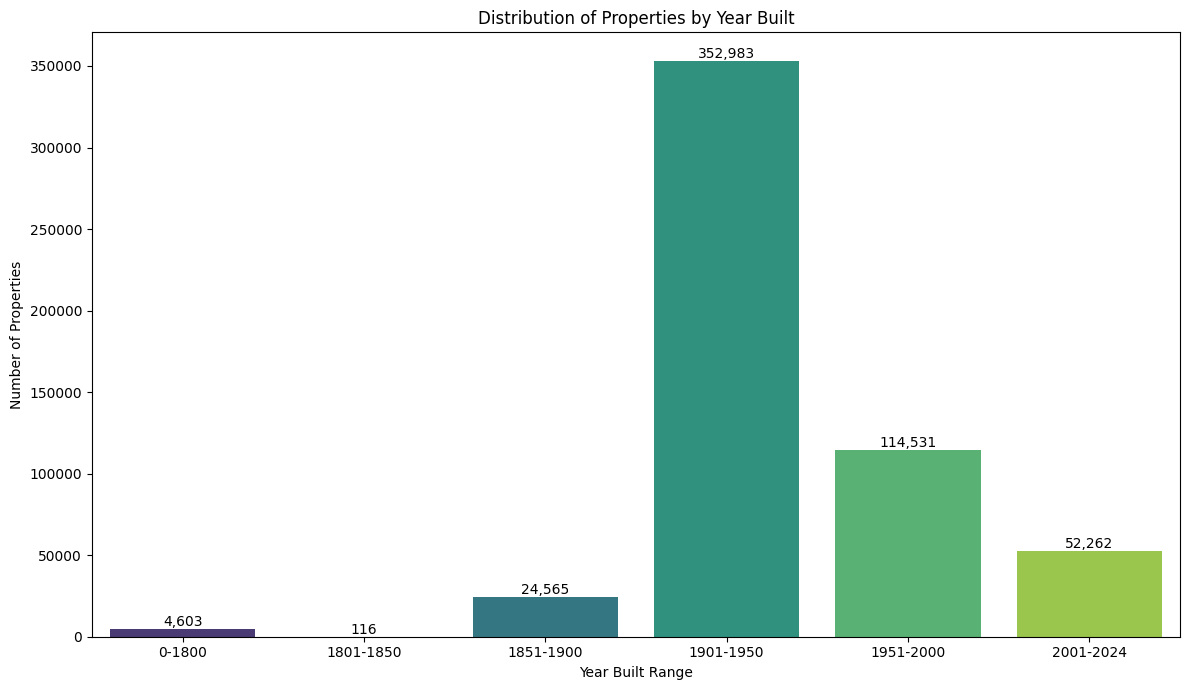

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from textwrap import wrap

# Define custom bins for 'YEAR BUILT'
bins = [0, 1800, 1850, 1900, 1950, 2000, 2024]
labels = [
    '0-1800',
    '1801-1850',
    '1851-1900',
    '1901-1950',
    '1951-2000',
    '2001-2024'
]

# Bin the 'YEAR BUILT' column
binned_year_built = pd.cut(df['YEAR BUILT'], bins=bins, labels=labels, right=True, include_lowest=True)

# Get the value counts for each bin
binned_counts_year_built = binned_year_built.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=binned_counts_year_built.index, y=binned_counts_year_built.values, hue=binned_counts_year_built.index, palette='viridis', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Year Built')
plt.xlabel('Year Built Range')
plt.ylabel('Number of Properties')

# Rotate x-axis labels if needed
plt.xticks(rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(binned_counts_year_built.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['RESIDENTIAL UNITS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: RESIDENTIAL UNITS
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['RESIDENTIAL UNITS'].isnull().sum()

np.int64(0)

In [ ]:
df['RESIDENTIAL UNITS'].nunique()

63

In [ ]:
df['RESIDENTIAL UNITS'].unique()

array([   1,    2,    3,    4,    0,   20,    8,    5,    6,    9,   10,
         30,   57,   27,    7,   69,   38,   21,   22,   11,   12,   40,
         13,   31,   14,   16,   17,   24,  106,   34,   42,   37,   65,
         32,   19,   36,   18,   15,   50,   49,   56,   29,   70,  208,
         33,   51,   26,   66,   89,   81,   43,   63,   23,   28,   41,
         45,   68,  230,   83, 1885,   35,   62,   78])

In [ ]:
df['RESIDENTIAL UNITS'].max()

1885

In [ ]:
df['RESIDENTIAL UNITS'].min()

0

In [ ]:
df['COMMERCIAL UNITS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: COMMERCIAL UNITS
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['COMMERCIAL UNITS'].isnull().sum()

np.int64(0)

In [ ]:
df['COMMERCIAL UNITS'].unique()

array([  0,   1,   2,   3,   8,   4,  84,   6,   9,   7,  62, 213,   5,
        59,  19])

In [ ]:
df['COMMERCIAL UNITS'].nunique()

15

In [ ]:
df['COMMERCIAL UNITS'].max()

213

In [ ]:
df['COMMERCIAL UNITS'].min()

0

In [ ]:
df['BUILDING CLASS CATEGORY DESCRIPTION'].unique()

array(['ONE FAMILY DWELLINGS', 'TWO FAMILY DWELLINGS',
       'THREE FAMILY DWELLINGS', 'ONE FAMILY HOMES', 'THREE FAMILY HOMES',
       'TWO FAMILY HOMES'], dtype=object)

In [ ]:
df['BUILDING CLASS CATEGORY DESCRIPTION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: BUILDING CLASS CATEGORY DESCRIPTION
Non-Null Count   Dtype 
--------------   ----- 
549060 non-null  object
dtypes: object(1)
memory usage: 4.2+ MB


In [ ]:
df['BUILDING CLASS CATEGORY DESCRIPTION'].isnull().sum()

np.int64(0)

In [ ]:
df['BUILDING CLASS CATEGORY DESCRIPTION'].nunique()

6

In [ ]:
df['BUILDING CLASS CATEGORY DESCRIPTION'].value_counts()

,count
BUILDING CLASS CATEGORY DESCRIPTION,
ONE FAMILY DWELLINGS,136897
ONE FAMILY HOMES,135356
TWO FAMILY HOMES,116926
TWO FAMILY DWELLINGS,103847
THREE FAMILY HOMES,30754
THREE FAMILY DWELLINGS,25280


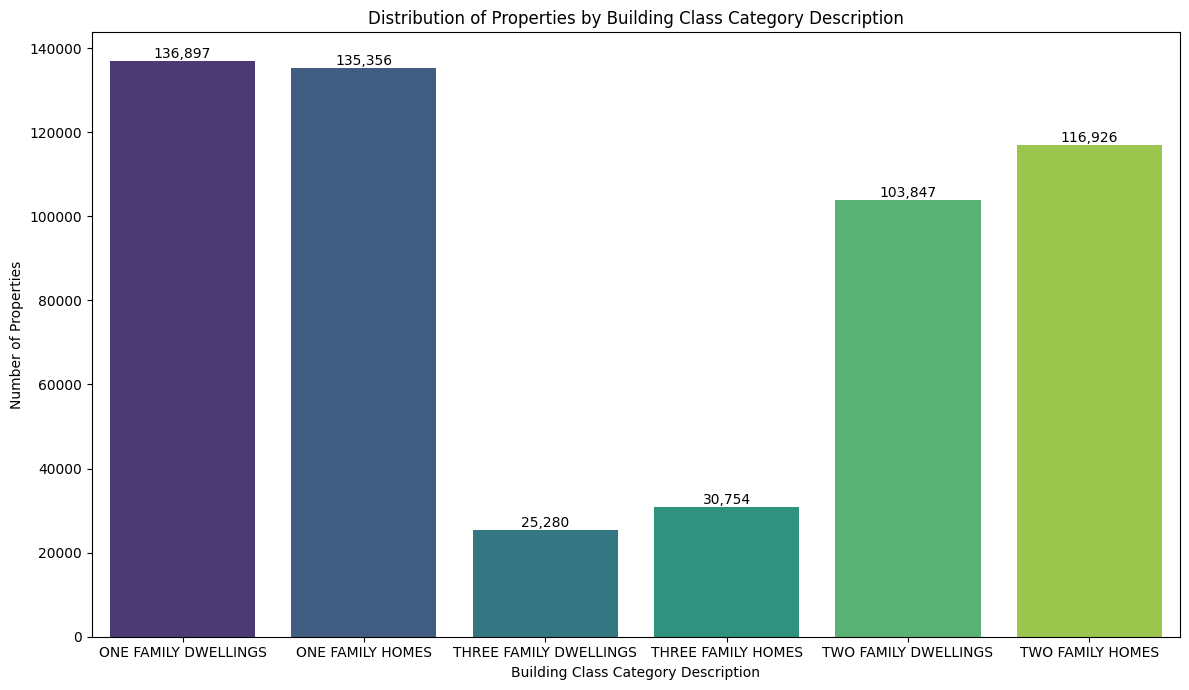

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'BUILDING CLASS CATEGORY DESCRIPTION' column
building_class_category_counts = df['BUILDING CLASS CATEGORY DESCRIPTION'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=building_class_category_counts.index, y=building_class_category_counts.values, hue=building_class_category_counts.index, palette='viridis', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Building Class Category Description')
plt.xlabel('Building Class Category Description')
plt.ylabel('Number of Properties')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(building_class_category_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['BUILDING CLASS AT TIME OF SALE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: BUILDING CLASS AT TIME OF SALE
Non-Null Count   Dtype 
--------------   ----- 
549060 non-null  object
dtypes: object(1)
memory usage: 4.2+ MB


In [ ]:
df['BUILDING CLASS AT TIME OF SALE'].isnull().sum()

np.int64(0)

In [ ]:
df['BUILDING CLASS AT TIME OF SALE'].nunique()

18

In [ ]:
df['BUILDING CLASS AT TIME OF SALE'].unique()

array(['A4', 'S2', 'S1', 'A9', 'B9', 'C0', 'B1', 'A5', 'B3', 'A1', 'B2',
       'A7', 'S0', 'A2', 'A6', 'A3', 'A0', 'A8'], dtype=object)

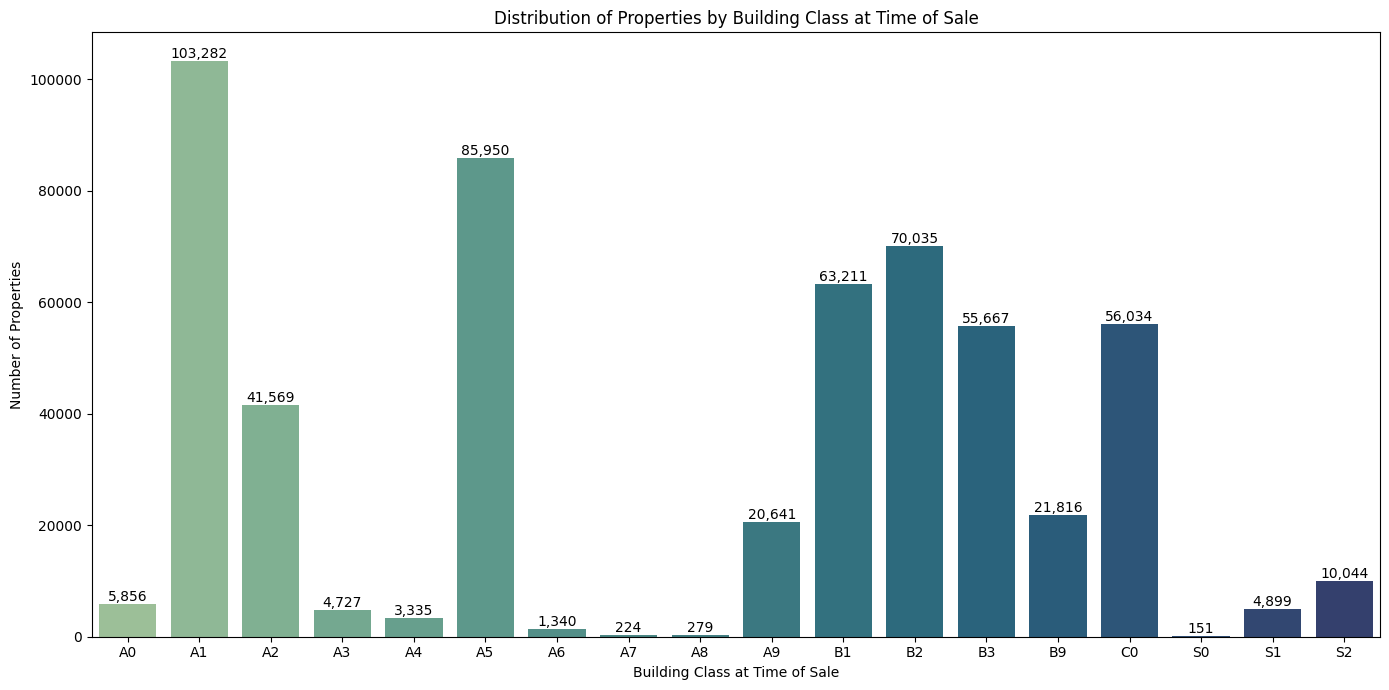

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'BUILDING CLASS AT TIME OF SALE' column
building_class_sale_counts = df['BUILDING CLASS AT TIME OF SALE'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=building_class_sale_counts.index, y=building_class_sale_counts.values, hue=building_class_sale_counts.index, palette='crest', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Building Class at Time of Sale')
plt.xlabel('Building Class at Time of Sale')
plt.ylabel('Number of Properties')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(building_class_sale_counts.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['SALE PRICE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: SALE PRICE
Non-Null Count   Dtype
--------------   -----
549060 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [ ]:
df['SALE PRICE'].isnull().sum()

np.int64(0)

In [ ]:
df['SALE PRICE'].unique()

array([  399000,  2999999, 11100000, ...,  1014199,   302907,   651274])

In [ ]:
df['SALE PRICE'].nunique()

34857

In [ ]:
df['SALE PRICE'].max()

87400000

In [ ]:
df['SALE PRICE'].min()

15000

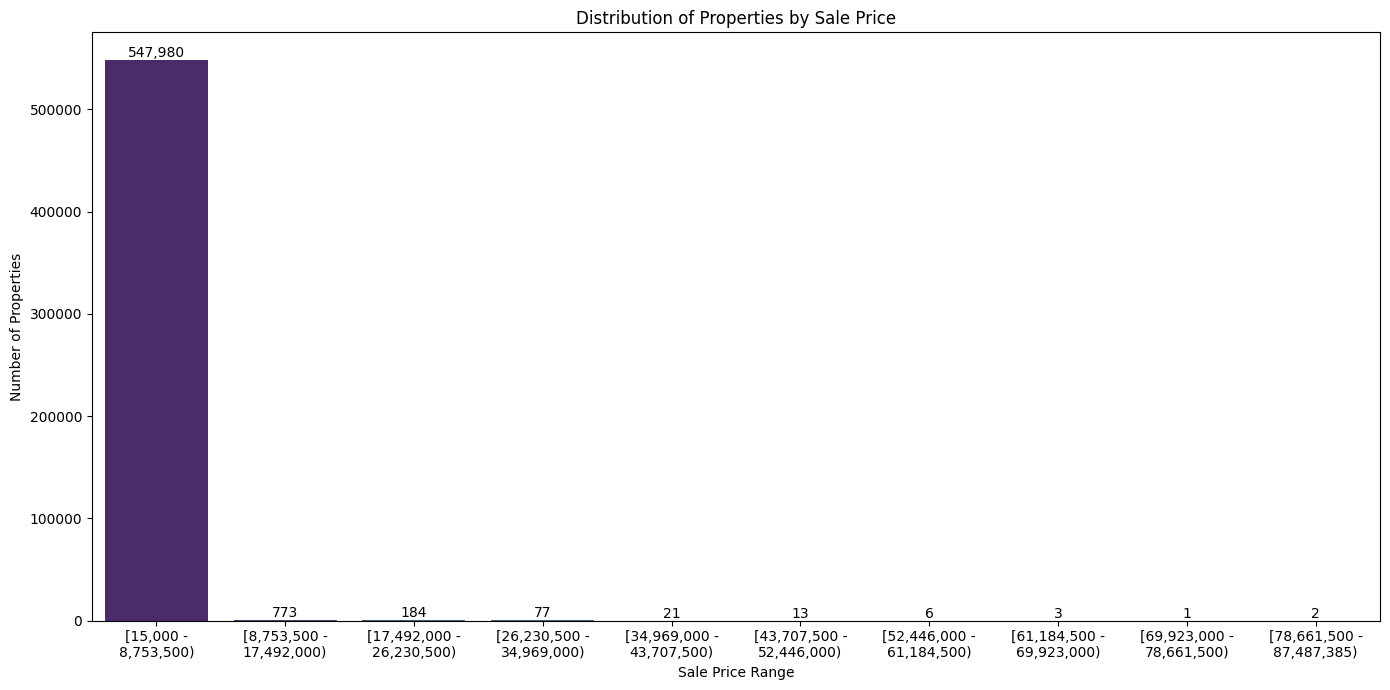

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from textwrap import wrap

# Based on previous analysis, min sale price was 15000
sale_price_filtered = df[df['SALE PRICE'] >= 15000]['SALE PRICE']

# Create bins for SALE PRICE (e.g., 10 bins)
sale_price_bins = pd.cut(sale_price_filtered, bins=10, right=False, include_lowest=True)

# Get the value counts for each bin and sort by bin order
binned_counts_sale_price = sale_price_bins.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=binned_counts_sale_price.index.astype(str), y=binned_counts_sale_price.values, hue=binned_counts_sale_price.index.astype(str), palette='viridis', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Sale Price')
plt.xlabel('Sale Price Range')
plt.ylabel('Number of Properties')

# Format bin labels as integers and wrap for readability
formatted_labels = []
for interval in binned_counts_sale_price.index:
    label = f'[{int(interval.left):,} - {int(interval.right):,})'
    formatted_labels.append(label)
wrapped_labels = [ '\n'.join(wrap(label, 15)) for label in formatted_labels ]
plt.xticks(ticks=range(len(binned_counts_sale_price.index)), labels=wrapped_labels, rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(binned_counts_sale_price.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

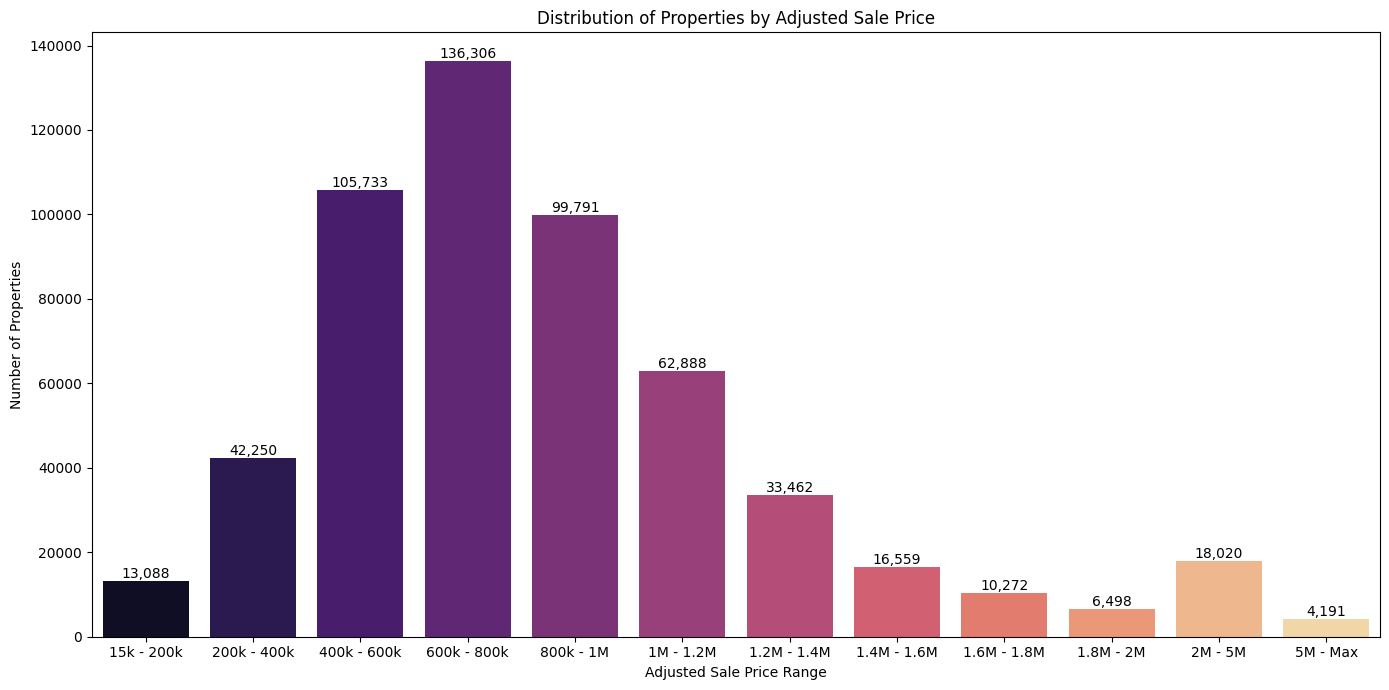

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from textwrap import wrap

adjusted_sale_price_filtered = df[df['ADJUSTED SALE PRICE'] > 0]['ADJUSTED SALE PRICE']

# Define custom bins for 'ADJUSTED SALE PRICE'
bins = [15000, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000, 5000000, adjusted_sale_price_filtered.max()]
labels = ['15k - 200k', '200k - 400k', '400k - 600k', '600k - 800k', '800k - 1M', '1M - 1.2M', '1.2M - 1.4M', '1.4M - 1.6M', '1.6M - 1.8M', '1.8M - 2M',
 '2M - 5M', '5M - Max']

# Create bins for ADJUSTED SALE PRICE using custom ranges
adjusted_sale_price_bins = pd.cut(adjusted_sale_price_filtered, bins=bins, labels=labels, right=False, include_lowest=True)

# Get the value counts for each bin and sort by bin order
binned_counts_adjusted_sale_price = adjusted_sale_price_bins.value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=binned_counts_adjusted_sale_price.index, y=binned_counts_adjusted_sale_price.values, hue=binned_counts_adjusted_sale_price.index, palette='magma', legend=False)

# Add titles and labels
plt.title('Distribution of Properties by Adjusted Sale Price')
plt.xlabel('Adjusted Sale Price Range')
plt.ylabel('Number of Properties')

# Rotate x-axis labels for readability
plt.xticks(rotation=0, ha='center')

# Add values on top of the bars
for index, value in enumerate(binned_counts_adjusted_sale_price.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import folium

# Filter out entries where 'ADJUSTED SALE PRICE' is 0 or NaN for meaningful visualization
map_df = df[df['ADJUSTED SALE PRICE'] > 0].copy()

# Calculate the mean latitude and longitude to center the map
mean_latitude = map_df['latitude'].mean()
mean_longitude = map_df['longitude'].mean()

# Create a Folium map centered at the mean coordinates
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)
# Add a small constant to avoid log(0) issues if there are any, though we filtered out <=0.
map_df['LOG_ADJUSTED_SALE_PRICE'] = np.log1p(map_df['ADJUSTED SALE PRICE'])

# Define a colormap
max_log_price = map_df['LOG_ADJUSTED_SALE_PRICE'].max()
min_log_price = map_df['LOG_ADJUSTED_SALE_PRICE'].min()

# Create a color map for visualization based on the log of adjusted sale price
colors = [
    '#FFF5F0', '#FEE0D2', '#FCBBA1', '#FC9272', '#FB6A4A',
    '#EF3B2C', '#CB181D', '#A50F15', '#67000D'
]
color_scale = folium.LinearColormap(
    colors,
    vmin=min_log_price,
    vmax=max_log_price,
    caption='Log Adjusted Sale Price'
)
m.add_child(color_scale)

# Add markers for a sample of properties to avoid overcrowding for very large datasets
# Limiting to first 50000 for demonstration. For full data, consider clustering or heatmap.
for idx, row in map_df.sample(min(50000, len(map_df)), random_state=42).iterrows():
    # Get color based on log adjusted sale price
    color = color_scale(row['LOG_ADJUSTED_SALE_PRICE'])

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=0.05, # Smaller radius for more points
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Borough: {row['BOROUGH']}<br>Neighborhood: {row['NEIGHBORHOOD']}<br>Adjusted Sale Price: ${row['ADJUSTED SALE PRICE']:,.0f}"
    ).add_to(m)

# Display the map
m

Output hidden; open in https://colab.research.google.com to view.

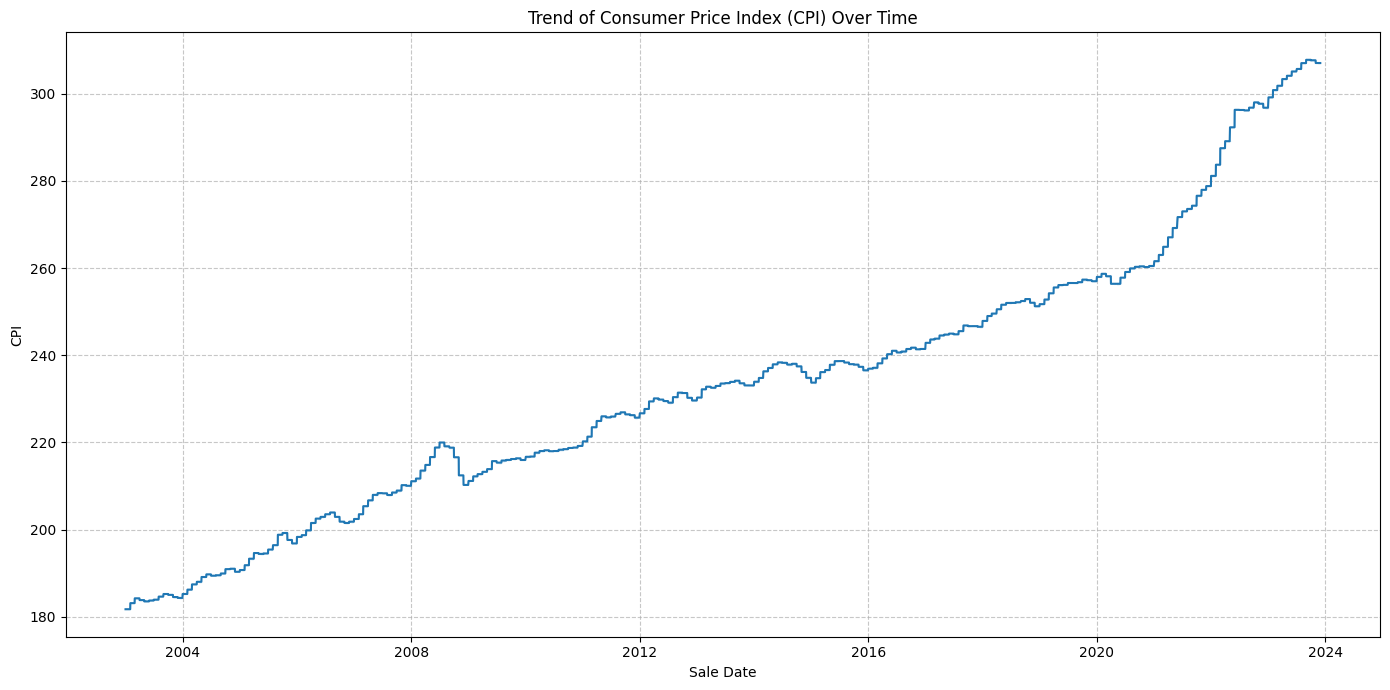

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'SALE DATE' is in datetime format
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# Sort by 'SALE DATE' to ensure the line plot is continuous
df_sorted = df.sort_values(by='SALE DATE')

# Create the line plot for CPI over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='SALE DATE', y='CPI', data=df_sorted)

# Add titles and labels
plt.title('Trend of Consumer Price Index (CPI) Over Time')
plt.xlabel('Sale Date')
plt.ylabel('CPI')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df['latitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: latitude
Non-Null Count   Dtype  
--------------   -----  
549060 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [ ]:
df['latitude'].isnull().sum()

np.int64(0)

In [ ]:
df['latitude'].nunique()

322085

In [ ]:
print(f"Min Latitude: {df['latitude'].min()}")
print(f"Max Latitude: {df['latitude'].max()}")

Min Latitude: 40.4985796
Max Latitude: 40.9126812


In [ ]:
df['longitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 549060 entries, 0 to 549059
Series name: longitude
Non-Null Count   Dtype  
--------------   -----  
549060 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [ ]:
df['longitude'].isnull().sum()

np.int64(0)

In [ ]:
df['longitude'].nunique()

328273

In [ ]:
print(f"Min Longitude: {df['longitude'].min()}")
print(f"Max Longitude: {df['longitude'].max()}")

Min Longitude: -74.2556279
Max Longitude: -73.700419


⚠️ Note: Folium maps do not render in GitHub’s notebook preview.
Please open the notebook locally, or in Google Colab.

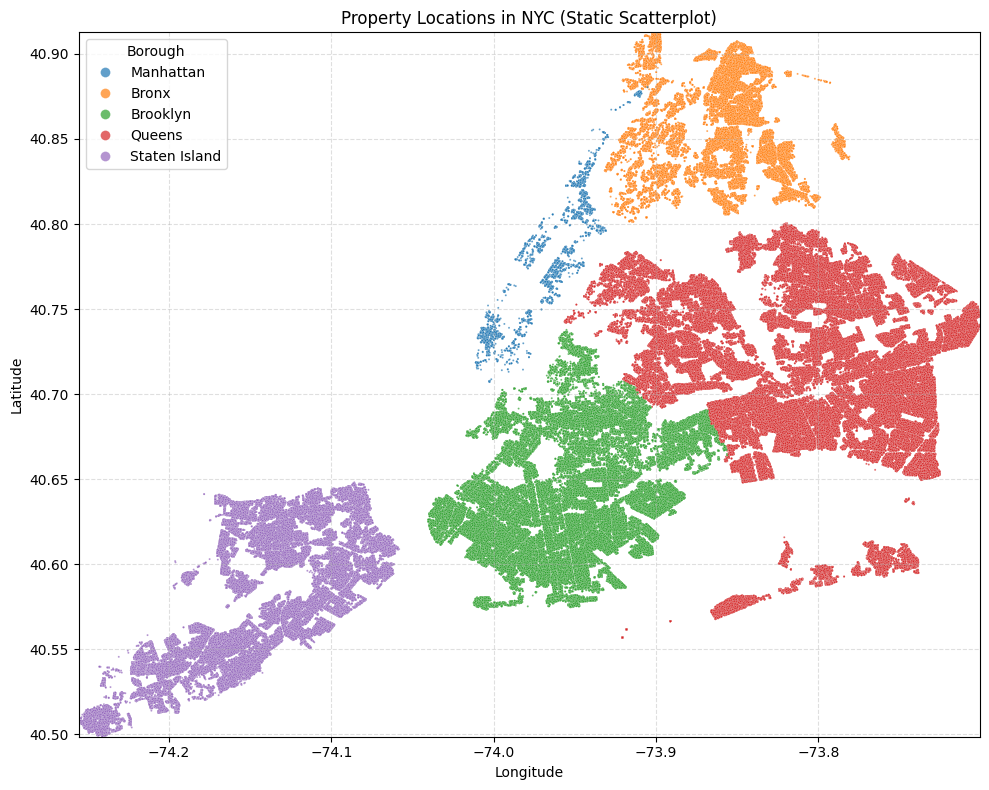

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map borough numbers to names for the legend
borough_names = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}
df['BOROUGH_NAME'] = df['BOROUGH'].map(borough_names)

# Create a plain scatterplot of latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='BOROUGH_NAME', palette='tab10', s=2, alpha=0.7)

# Add titles and labels
plt.title('Property Locations in NYC (Static Scatterplot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set explicit limits for longitude and latitude to ensure all points are within view
plt.xlim(df['longitude'].min(), df['longitude'].max())
plt.ylim(df['latitude'].min(), df['latitude'].max())

# Adjust legend to show larger color dots
plt.legend(title='Borough', markerscale=5) # markerscale=5 will make the legend markers 5 times larger

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
import folium

# Calculate the mean latitude and longitude to center the map
mean_latitude = df['latitude'].mean()
mean_longitude = df['longitude'].mean()

# Create a Folium map centered at the mean coordinates
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)

# Add markers for a small subset of properties (e.g., first 100)
for idx, row in df.head(100).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Borough: {row['BOROUGH']}<br>Neighborhood: {row['NEIGHBORHOOD']}<br>Sale Price: ${row['SALE PRICE']:,.0f}"
    ).add_to(m)

# Display the map
m

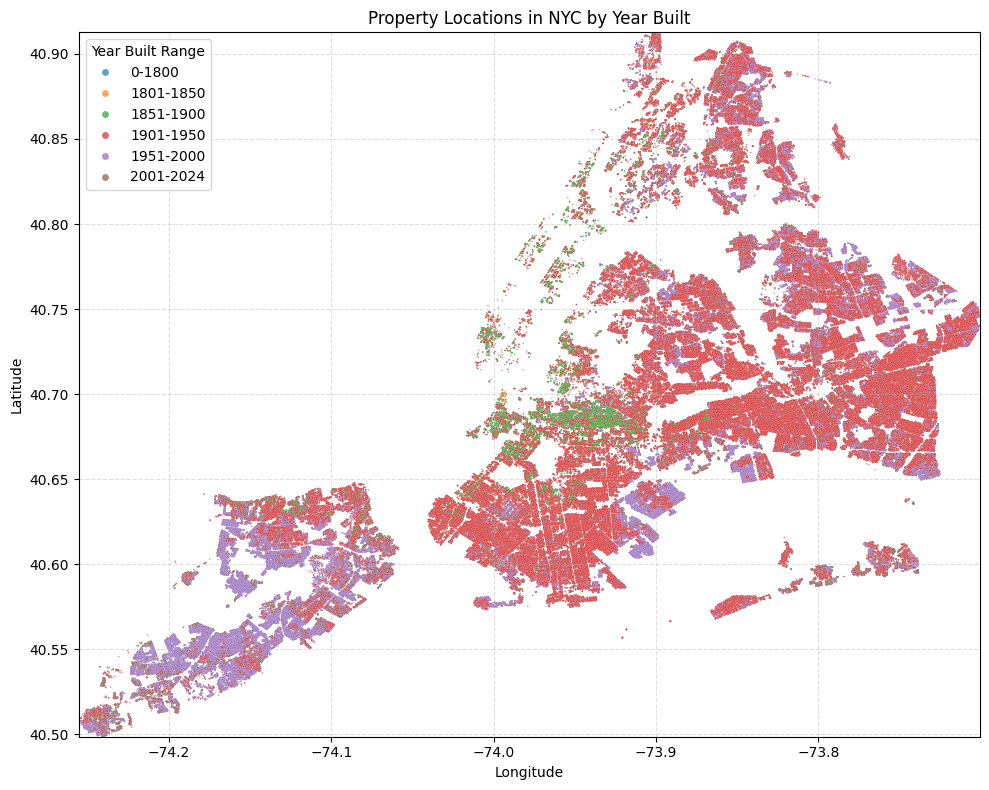

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define custom bins for 'YEAR BUILT'
bins = [0, 1800, 1850, 1900, 1950, 2000, 2024]
labels = ['0-1800', '1801-1850', '1851-1900', '1901-1950', '1951-2000', '2001-2024']

# Bin the 'YEAR BUILT' column
df['BINNED YEAR BUILT'] = pd.cut(df['YEAR BUILT'], bins=bins, labels=labels, right=True, include_lowest=True)

# Create a plain scatterplot of latitude and longitude, using binned years for hue
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='BINNED YEAR BUILT', palette='tab10', s=1, alpha=0.7)

# Add titles and labels
plt.title('Property Locations in NYC by Year Built')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set explicit limits for longitude and latitude to ensure all points are within view
plt.xlim(df['longitude'].min(), df['longitude'].max())
plt.ylim(df['latitude'].min(), df['latitude'].max())

# Adjust legend to show larger color dots
plt.legend(title='Year Built Range', markerscale=5)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()